In [247]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import plotly.express as px
import plotly.graph_objects as go
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [248]:
df = pd.read_csv('allregoion.csv')

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [249]:
df

,Unnamed: 0.1,Unnamed: 0,Title,Rating,Price,region,Airport Shuttle,Business Centre,Facilities for Disabled,Fitness Centre,Restaurant,Room Service,Spa,Swimming Pool,Wellness Centre
0,0,0,"Radisson Blu Hotel, Jeddah Al Salam",8.7,540,Jeddah,0,0,0,0,0,0,0,1,0
1,1,1,Holiday Inn JEDDAH GATEWAY,8.4,614,Jeddah,0,0,0,0,0,0,0,1,0
2,2,2,Golden New Palace,8.2,193,Jeddah,0,0,0,0,0,0,1,0,1
3,3,3,Habitat Hotel All Suites - Jeddah,7.4,375,Jeddah,0,0,0,0,1,0,0,1,0
4,4,4,Donatello Hotel Jeddah,8.1,472,Jeddah,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3225,3225,28,Al Dar Hotel Apartments,7.3,178,Jazan,0,0,0,0,0,1,0,0,0
3226,3226,29,Courtyard Jazan,8.5,450,Jazan,0,0,0,0,0,0,0,1,0
3227,3227,30,Msharef Al Moden Suites - Jazan,9.1,398,Jazan,0,0,0,0,0,0,0,0,0
3228,3228,31,Al Dar Hotel Apartments,7.3,178,Jazan,0,0,0,0,0,1,0,0,0


## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [250]:
df.shape

(3230, 15)

In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3230 entries, 0 to 3229
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0.1             3230 non-null   int64  
 1   Unnamed: 0               3230 non-null   int64  
 2   Title                    3230 non-null   object 
 3   Rating                   3230 non-null   float64
 4   Price                    3230 non-null   object 
 5   region                   3230 non-null   object 
 6   Airport Shuttle          3230 non-null   int64  
 7   Business Centre          3230 non-null   int64  
 8   Facilities for Disabled  3230 non-null   int64  
 9   Fitness Centre           3230 non-null   int64  
 10  Restaurant               3230 non-null   int64  
 11  Room Service             3230 non-null   int64  
 12  Spa                      3230 non-null   int64  
 13  Swimming Pool            3230 non-null   int64  
 14  Wellness Centre         

In [252]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,Rating,Airport Shuttle,Business Centre,Facilities for Disabled,Fitness Centre,Restaurant,Room Service,Spa,Swimming Pool,Wellness Centre
count,3230.000000,3230.000000,3230.000000,3230.000000,3230.000000,3230.00000,3230.000000,3230.000000,3230.000000,3230.000000,3230.000000,3230.000000
mean,1614.500000,285.478947,7.913034,0.001858,0.008669,0.03808,0.020433,0.339628,0.180805,0.025077,0.448916,0.025077
std,932.565011,214.584967,0.890659,0.043066,0.092716,0.19142,0.141500,0.473656,0.384916,0.156384,0.497461,0.156384
min,0.000000,0.000000,4.200000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,807.250000,110.000000,7.500000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1614.500000,239.500000,8.100000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2421.750000,426.750000,8.500000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,3229.000000,870.000000,10.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

In [253]:
# we discrapping the data from wego website 

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

In [254]:
# The dataset is up-to-date 

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


In [255]:
# The dataset is completely consistene every columns have the same valuse type 

#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [256]:
df.drop(columns='Unnamed: 0.1' , inplace = True)
df.drop(columns='Unnamed: 0' , inplace = True)

In [257]:
df.rename(columns={
    'Title' : 'Hotel_Name',
    'Airport Shuttle' : 'Airport_Shuttle',
    'Business Centre' : 'Business_Centre',
    'Facilities for Disabled' : 'Facilities',
    'Fitness Centre' : 'Fitness_Centre',
    'Room Service' : 'Room_Service',
    'Swimming Pool' : 'Swimming_Pool',
    'Wellness Centre' : 'Wellness_Centre'
} , inplace=True)

#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [258]:
df.shape

(3230, 13)

In [259]:
df[df.duplicated()]

,Hotel_Name,Rating,Price,region,Airport_Shuttle,Business_Centre,Facilities,Fitness_Centre,Restaurant,Room_Service,Spa,Swimming_Pool,Wellness_Centre
26,Iridium 70 Hotel,8.9,335,Jeddah,0,0,0,0,0,0,0,1,0
28,Shada Hotel Shati,8.8,468,Jeddah,0,0,0,0,0,0,0,1,0
29,Shangri-La Jeddah,8.3,"1,883",Jeddah,0,0,0,0,0,0,0,1,0
59,"Radisson Blu Hotel, Jeddah Al Salam",8.7,540,Jeddah,0,0,0,0,0,0,0,1,0
61,Golden New Palace,8.2,193,Jeddah,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3215,Novotel Jazan,8.7,476,Jazan,0,0,0,0,1,0,0,1,0
3216,Golden Armada Hotel,8.9,170,Jazan,0,0,0,0,0,0,0,1,0
3227,Msharef Al Moden Suites - Jazan,9.1,398,Jazan,0,0,0,0,0,0,0,0,0
3228,Al Dar Hotel Apartments,7.3,178,Jazan,0,0,0,0,0,1,0,0,0


In [260]:
df.drop_duplicates(inplace = True)

#### 6. Completeness: 

In [261]:
df.isnull().sum()

Hotel_Name         0
Rating             0
Price              0
region             0
Airport_Shuttle    0
Business_Centre    0
Facilities         0
Fitness_Centre     0
Restaurant         0
Room_Service       0
Spa                0
Swimming_Pool      0
Wellness_Centre    0
dtype: int64

#### 7. Check Accuracy:

In [262]:
df.dtypes

Hotel_Name          object
Rating             float64
Price               object
region              object
Airport_Shuttle      int64
Business_Centre      int64
Facilities           int64
Fitness_Centre       int64
Restaurant           int64
Room_Service         int64
Spa                  int64
Swimming_Pool        int64
Wellness_Centre      int64
dtype: object

## 2. Data Cleaning: 

-------------------



In [263]:
df['Price'] = df['Price'].str.replace(",", '.')

In [264]:
df = df.astype({"Price": float})

In [265]:
df

,Hotel_Name,Rating,Price,region,Airport_Shuttle,Business_Centre,Facilities,Fitness_Centre,Restaurant,Room_Service,Spa,Swimming_Pool,Wellness_Centre
0,"Radisson Blu Hotel, Jeddah Al Salam",8.7,540.0,Jeddah,0,0,0,0,0,0,0,1,0
1,Holiday Inn JEDDAH GATEWAY,8.4,614.0,Jeddah,0,0,0,0,0,0,0,1,0
2,Golden New Palace,8.2,193.0,Jeddah,0,0,0,0,0,0,1,0,1
3,Habitat Hotel All Suites - Jeddah,7.4,375.0,Jeddah,0,0,0,0,1,0,0,1,0
4,Donatello Hotel Jeddah,8.1,472.0,Jeddah,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3222,Al Sultan Hostel,8.7,330.0,Jazan,0,0,0,0,1,0,0,0,0
3223,Jizan Park Hotel,7.8,349.0,Jazan,0,0,0,0,0,0,0,0,0
3224,Msharef Al Moden Suites - Jazan,9.1,398.0,Jazan,0,0,0,0,0,0,0,0,0
3225,Al Dar Hotel Apartments,7.3,178.0,Jazan,0,0,0,0,0,1,0,0,0


In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1424 entries, 0 to 3226
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Hotel_Name       1424 non-null   object 
 1   Rating           1424 non-null   float64
 2   Price            1424 non-null   float64
 3   region           1424 non-null   object 
 4   Airport_Shuttle  1424 non-null   int64  
 5   Business_Centre  1424 non-null   int64  
 6   Facilities       1424 non-null   int64  
 7   Fitness_Centre   1424 non-null   int64  
 8   Restaurant       1424 non-null   int64  
 9   Room_Service     1424 non-null   int64  
 10  Spa              1424 non-null   int64  
 11  Swimming_Pool    1424 non-null   int64  
 12  Wellness_Centre  1424 non-null   int64  
dtypes: float64(2), int64(9), object(2)
memory usage: 155.8+ KB


## 4. Bivariate/Multivariate Analysis:

In [267]:
numeric_col = [col for col in df.columns if df[col].dtype != 'object']
cate_col = [col for col in df.columns if df[col].dtype == 'object']        

C:\Users\gharb\AppData\Local\Temp\ipykernel_28924\362275289.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_name_rate, y='Rating', x='Hotel_Name', palette='coolwarm', alpha=0.85, linewidth=2, edgecolor='black')
C:\Users\gharb\AppData\Local\Temp\ipykernel_28924\362275289.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12, fontfamily='monospace')


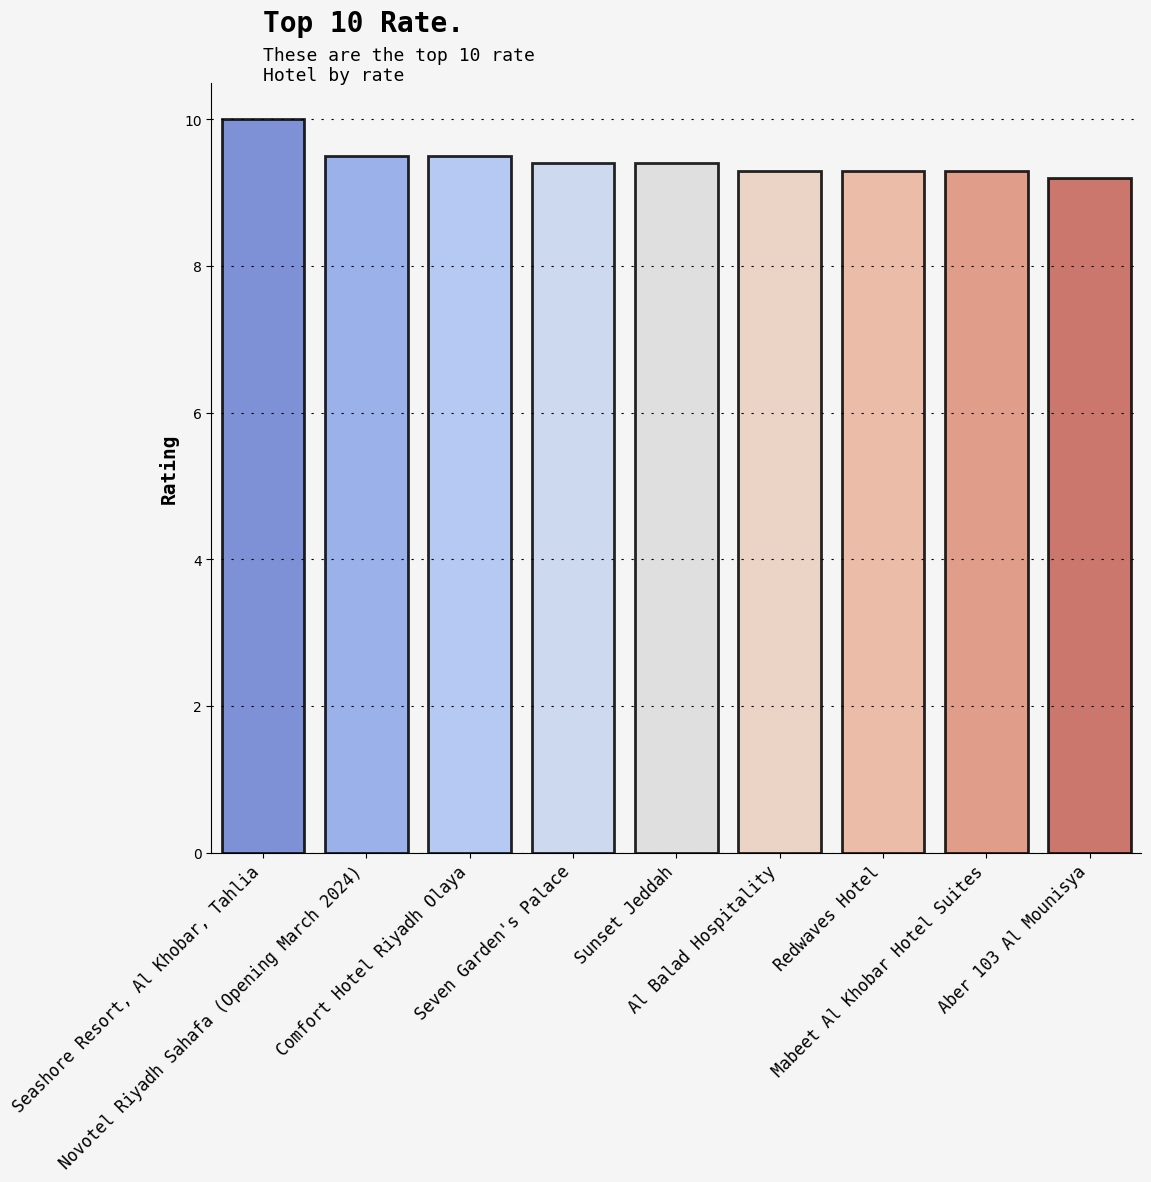

In [283]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort the DataFrame by 'Rating' and get the top 10
df_name_rate = df[['Rating', 'Hotel_Name']].sort_values(by='Rating', ascending=False).head(15)

# Create a bar plot for the top 10 names by rate
fig, ax = plt.subplots(figsize=(12, 10))
sns.barplot(data=df_name_rate, y='Rating', x='Hotel_Name', palette='coolwarm', alpha=0.85, linewidth=2, edgecolor='black')

# Customize the plot
sns.despine()
fig.set_facecolor('#F5F5F5')
ax.set_facecolor('#F5F5F5')
ax.set_ylabel('Rating', fontsize=14, fontweight='bold', fontfamily='monospace')
ax.set_xlabel('')
ax.grid(False)
ax.grid(which='both', axis='y', zorder=0, color='black', linestyle=':', dashes=(2,7))

# Rotate x-axis labels for clarity
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12, fontfamily='monospace')

# Add text annotations in the top-left corner
ax.text(x=0, y=max(df_name_rate['Rating']) + (max(df_name_rate['Rating']) * 0.15), 
        s='Top 10 Rate.', fontsize=20, fontweight='bold', fontfamily='monospace', 
        ha='left', va='top')
ax.text(x=0, y=max(df_name_rate['Rating'])+ (max(df_name_rate['Rating']) * 0.1), 
        s='These are the top 10 rate \nHotel by rate', fontsize=13, fontfamily='monospace', 
        ha='left', va='top')

# Display the plot
plt.show()


C:\Users\gharb\AppData\Local\Temp\ipykernel_28924\3471141750.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_name_rate, y='Rating', x='Hotel_Name', palette='coolwarm', alpha=0.85, linewidth=2, edgecolor='black')
C:\Users\gharb\AppData\Local\Temp\ipykernel_28924\3471141750.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12, fontfamily='monospace')


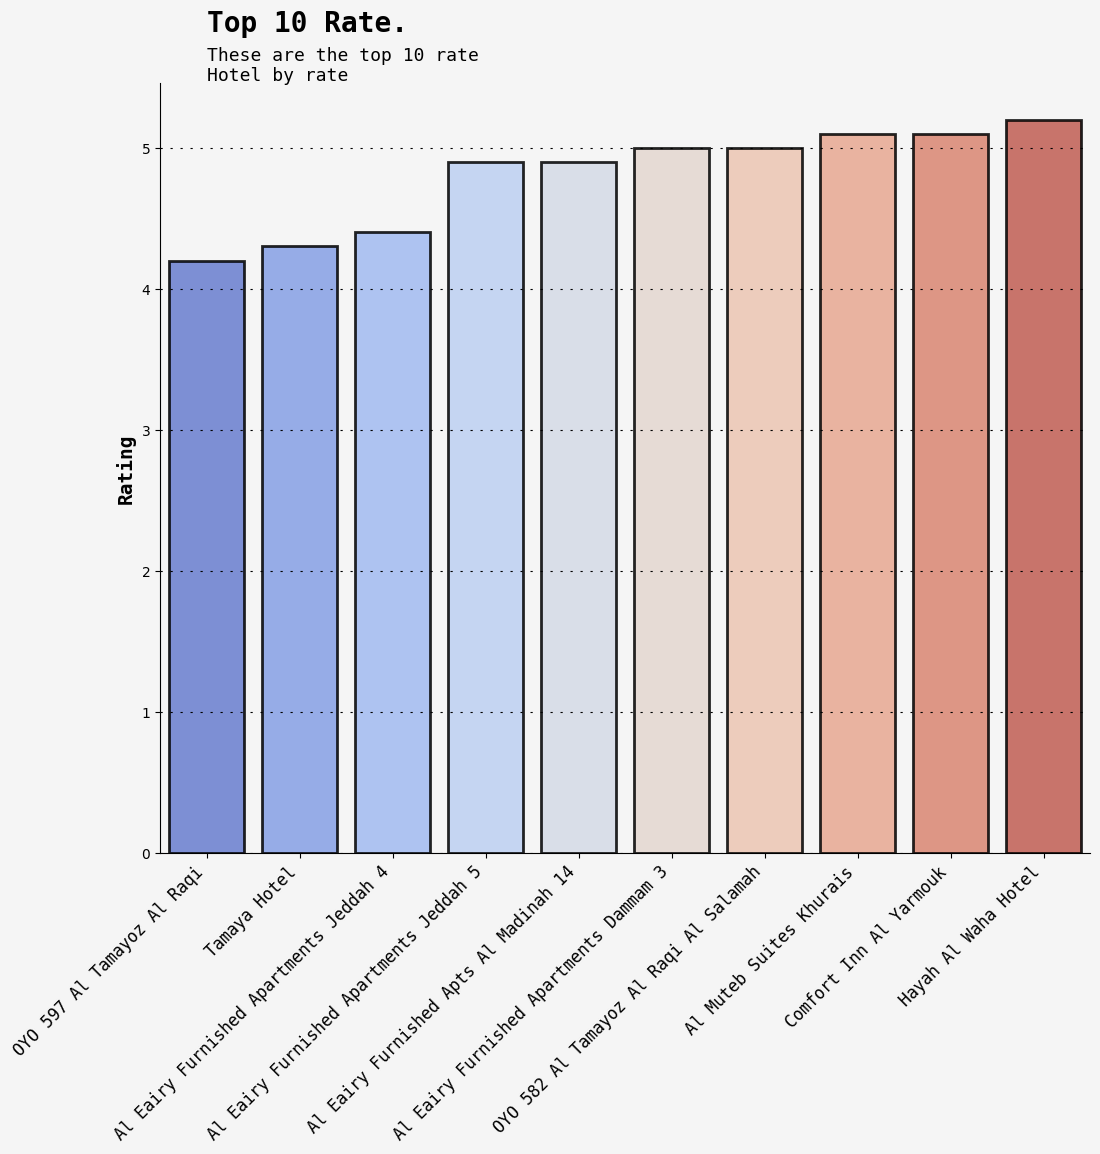

In [282]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort the DataFrame by 'Rating' and get the top 10
df_name_rate = df[['Rating', 'Hotel_Name']].sort_values(by='Rating', ascending=True).head(15)

# Create a bar plot for the top 10 names by rate
fig, ax = plt.subplots(figsize=(12, 10))
sns.barplot(data=df_name_rate, y='Rating', x='Hotel_Name', palette='coolwarm', alpha=0.85, linewidth=2, edgecolor='black')

# Customize the plot
sns.despine()
fig.set_facecolor('#F5F5F5')
ax.set_facecolor('#F5F5F5')
ax.set_ylabel('Rating', fontsize=14, fontweight='bold', fontfamily='monospace')
ax.set_xlabel('')
ax.grid(False)
ax.grid(which='both', axis='y', zorder=0, color='black', linestyle=':', dashes=(2,7))

# Rotate x-axis labels for clarity
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12, fontfamily='monospace')

# Add text annotations in the top-left corner
ax.text(x=0, y=max(df_name_rate['Rating']) + (max(df_name_rate['Rating']) * 0.15), 
        s='Top 10 Rate.', fontsize=20, fontweight='bold', fontfamily='monospace', 
        ha='left', va='top')
ax.text(x=0, y=max(df_name_rate['Rating'])+ (max(df_name_rate['Rating']) * 0.1), 
        s='These are the top 10 rate \nHotel by rate', fontsize=13, fontfamily='monospace', 
        ha='left', va='top')

# Display the plot
plt.show()


C:\Users\gharb\AppData\Local\Temp\ipykernel_28924\4220200266.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_services, y='Count', x='region', palette='coolwarm', alpha=0.85, linewidth=2, edgecolor='black')
C:\Users\gharb\AppData\Local\Temp\ipykernel_28924\4220200266.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12, fontfamily='monospace')


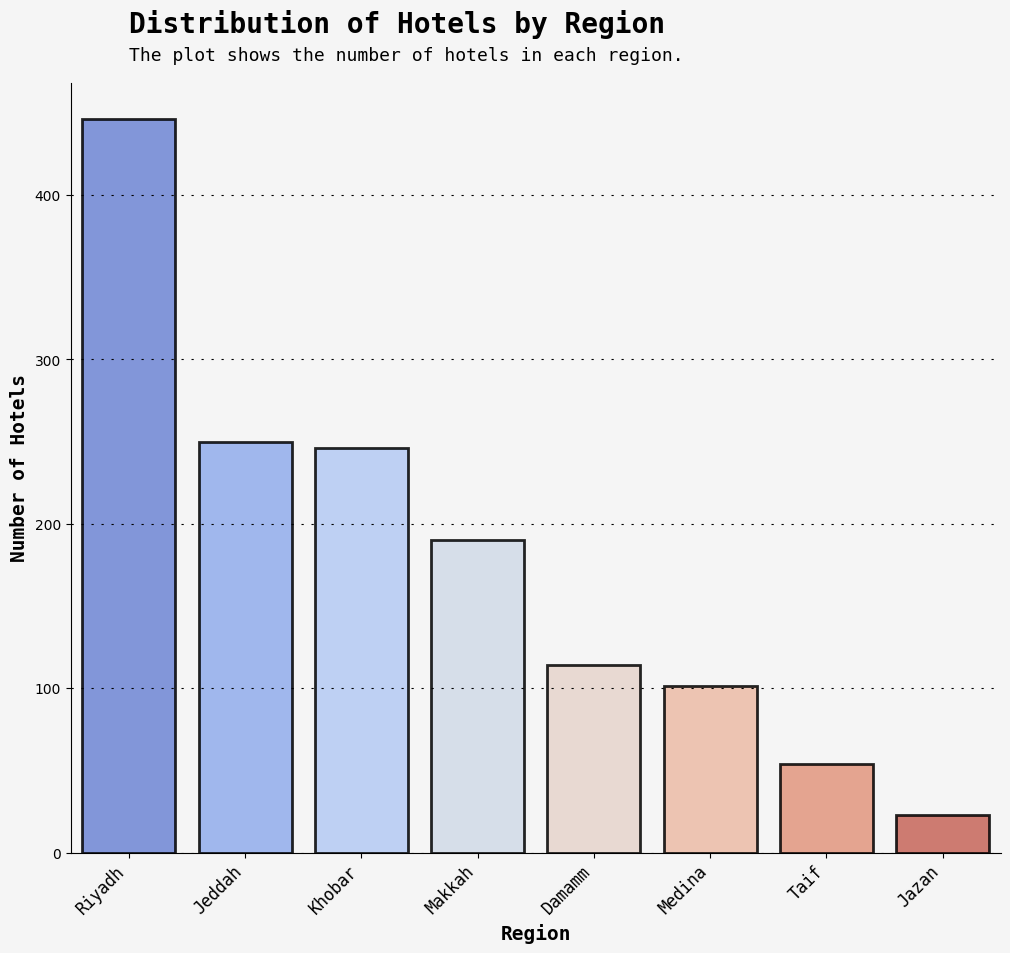

In [279]:
import seaborn as sns
import matplotlib.pyplot as plt

ser = df['region'].value_counts()
# Create a DataFrame from the Series 'ser' for easier plotting
df_services = ser.reset_index()
df_services.columns = ['region', 'Count']

# Create a bar plot for the top 5 most common services
fig, ax = plt.subplots(figsize=(12, 10))
sns.barplot(data=df_services, y='Count', x='region', palette='coolwarm', alpha=0.85, linewidth=2, edgecolor='black')

# Customize the plot
sns.despine()
fig.set_facecolor('#F5F5F5')
ax.set_facecolor('#F5F5F5')
ax.set_ylabel('Number of Hotels', fontsize=14, fontweight='bold', fontfamily='monospace')  # New y-axis label
ax.set_xlabel('Region', fontsize=14, fontweight='bold', fontfamily='monospace')  # New x-axis label
ax.grid(False)
ax.grid(which='both', axis='y', zorder=0, color='black', linestyle=':', dashes=(2,7))

# Rotate x-axis labels for clarity
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12, fontfamily='monospace')

# Add text annotations in the top-left corner
ax.text(x=0, y=max(df_services['Count']) + (max(df_services['Count']) * 0.15), 
        s='Distribution of Hotels by Region', fontsize=20, fontweight='bold', fontfamily='monospace',  # New title
        ha='left', va='top')
ax.text(x=0, y=max(df_services['Count']) + (max(df_services['Count']) * 0.1), 
        s='The plot shows the number of hotels in each region.', fontsize=13, fontfamily='monospace', 
        ha='left', va='top')

# Display the plot
plt.show()


In [274]:
df_region = df[['Hotel_Name' , 'Rating' , 'region']] 

C:\Users\gharb\AppData\Local\Temp\ipykernel_28924\4246307855.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_ratings, y='Rating', x='region', palette='coolwarm', alpha=0.85, linewidth=2, edgecolor='black')
C:\Users\gharb\AppData\Local\Temp\ipykernel_28924\4246307855.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12, fontfamily='monospace')


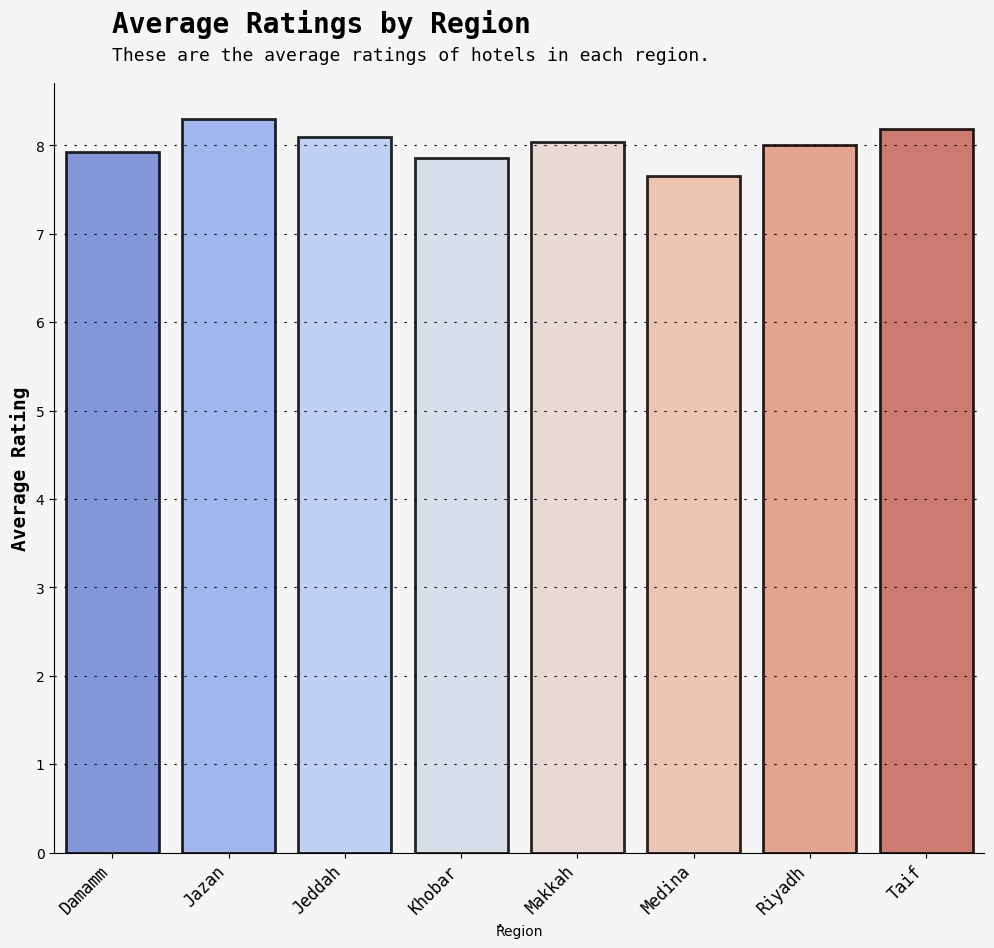

In [278]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_region is already defined and contains 'Hotel_Name', 'Rating', and 'region'

# Calculate the average rating for each region
average_ratings = df_region.groupby('region')['Rating'].mean().reset_index()

# Create a bar plot for the average ratings in each region
fig, ax = plt.subplots(figsize=(12, 10))
sns.barplot(data=average_ratings, y='Rating', x='region', palette='coolwarm', alpha=0.85, linewidth=2, edgecolor='black')

# Customize the plot
sns.despine()
fig.set_facecolor('#F5F5F5')
ax.set_facecolor('#F5F5F5')
ax.set_ylabel('Average Rating', fontsize=14, fontweight='bold', fontfamily='monospace')
ax.set_xlabel('ٌRegion')
ax.grid(False)
ax.grid(which='both', axis='y', zorder=0, color='black', linestyle=':', dashes=(2, 7))

# Rotate x-axis labels for clarity
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12, fontfamily='monospace')

# Add text annotations in the top-left corner
ax.text(x=0, y=max(average_ratings['Rating']) + (max(average_ratings['Rating']) * 0.15), 
        s='Average Ratings by Region', fontsize=20, fontweight='bold', fontfamily='monospace', 
        ha='left', va='top')
ax.text(x=0, y=max(average_ratings['Rating']) + (max(average_ratings['Rating']) * 0.1), 
        s='These are the average ratings of hotels in each region.', fontsize=13, fontfamily='monospace', 
        ha='left', va='top')

# Display the plot
plt.show()


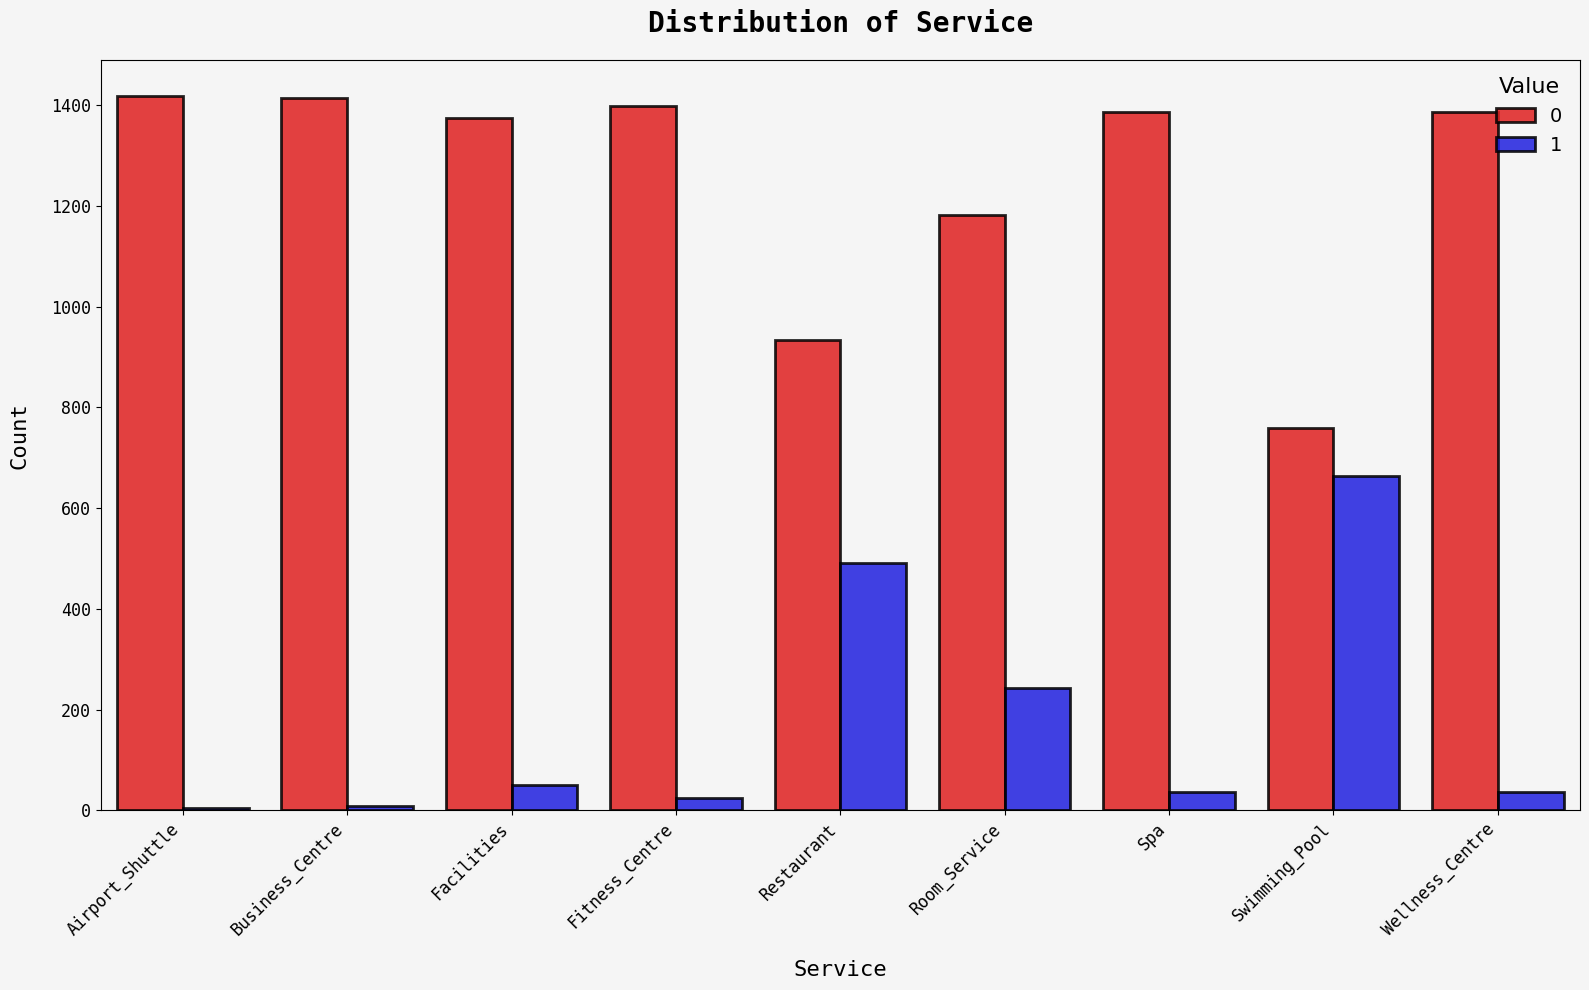

In [289]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_new is already defined and melted
plt.figure(figsize=(16, 10))

# Define the custom palette where True is blue and False is red
custom_palette = {1: 'blue', 0: 'red'}  # Assuming 1 represents True and 0 represents False

# Create the count plot with the custom palette
sns.countplot(data=df_melted, x='Column', hue='Value', palette=custom_palette, alpha=0.85, linewidth=2, edgecolor='black')

# Customize the plot
plt.title('Distribution of Service', fontsize=20, fontweight='bold', fontfamily='monospace', pad=20)
plt.xlabel('Service', fontsize=16, fontfamily='monospace', labelpad=15)
plt.ylabel('Count', fontsize=16, fontfamily='monospace', labelpad=15)
plt.xticks(rotation=45, ha='right', fontsize=12, fontfamily='monospace')
plt.yticks(fontsize=12, fontfamily='monospace')
plt.legend(title='Value', fontsize=14, title_fontsize=16, loc='upper right', frameon=False)
plt.grid(False)

# Set background colors to match the design
plt.gca().set_facecolor('#F5F5F5')
plt.gcf().set_facecolor('#F5F5F5')

plt.tight_layout()
plt.show()


In [303]:
import plotly.express as px

# Filter the DataFrame for hotels in Riyadh
df_riyadh = df[df['region'] == 'Riyadh']

# Create the histogram using Plotly with a creative color palette
fig = px.histogram(
    df_riyadh, 
    x='Price', 
    nbins=20, 
    color_discrete_sequence=px.colors.sequential.Tealgrn,  # Creative color palette
    title='Price Range of Hotels in Riyadh'
)

# Customize the layout
fig.update_layout(
    title_font=dict(size=20, family='monospace', color='black'),
    xaxis_title='Price',
    yaxis_title='Number of Hotels',
    font=dict(family='monospace', size=14),
    plot_bgcolor='#F5F5F5',
    paper_bgcolor='#F5F5F5'
)

# Display the plot
fig.show()


In [297]:
df

,Hotel_Name,Rating,Price,region,Airport_Shuttle,Business_Centre,Facilities,Fitness_Centre,Restaurant,Room_Service,Spa,Swimming_Pool,Wellness_Centre
0,"Radisson Blu Hotel, Jeddah Al Salam",8.7,540.0,Jeddah,0,0,0,0,0,0,0,1,0
1,Holiday Inn JEDDAH GATEWAY,8.4,614.0,Jeddah,0,0,0,0,0,0,0,1,0
2,Golden New Palace,8.2,193.0,Jeddah,0,0,0,0,0,0,1,0,1
3,Habitat Hotel All Suites - Jeddah,7.4,375.0,Jeddah,0,0,0,0,1,0,0,1,0
4,Donatello Hotel Jeddah,8.1,472.0,Jeddah,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3222,Al Sultan Hostel,8.7,330.0,Jazan,0,0,0,0,1,0,0,0,0
3223,Jizan Park Hotel,7.8,349.0,Jazan,0,0,0,0,0,0,0,0,0
3224,Msharef Al Moden Suites - Jazan,9.1,398.0,Jazan,0,0,0,0,0,0,0,0,0
3225,Al Dar Hotel Apartments,7.3,178.0,Jazan,0,0,0,0,0,1,0,0,0
